## Imports

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Read CSVs

In [10]:
def get_concacted_df_from_folder(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Read and concatenate all CSV files into one DataFrame
    df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
    concatenated_df = pd.concat(df_list, ignore_index=True)
    return concatenated_df

def get_i_df_from_folder(folder_path, i):
    csv_file = [f for f in os.listdir(folder_path) if f.endswith('.csv')][i]

    # Read and concatenate all CSV files into one DataFrame
    df = pd.read_csv(os.path.join(folder_path, csv_file))
    name = csv_file.split('.')[0]
    return df, name

def get_csv_count_from_folder(folder_path):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    return len(csv_files)



## Single File Analysis

- - - Gender - - -
          Count  Average Score
Gender                        
Female  3333361      51.310403
Other   3333426      50.968240
Male    3333213      50.796969



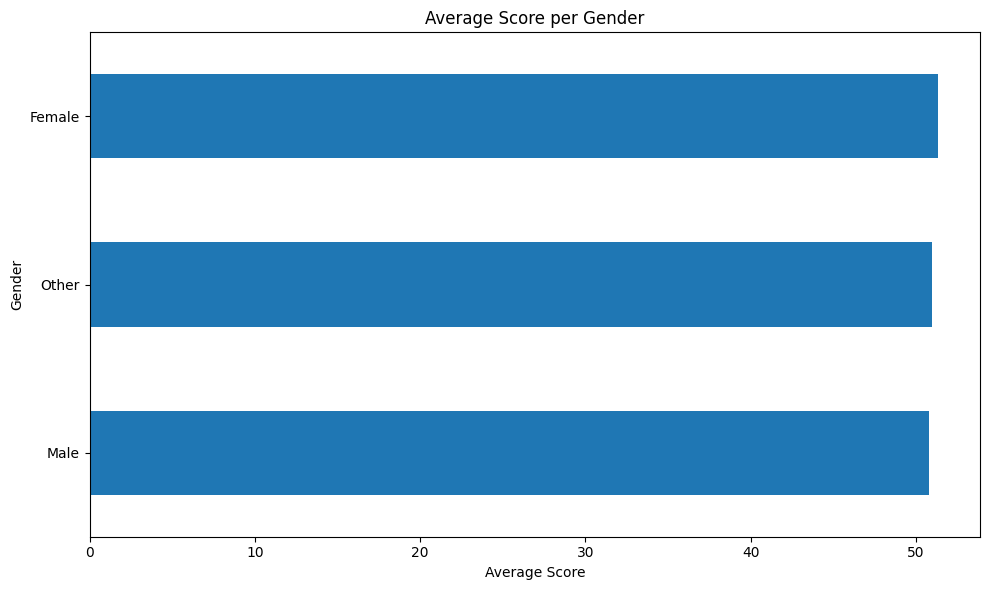

- - - Education - - -
                       Count  Average Score
Education                                  
PhD                  1666907      58.217233
MSc                  1666577      54.518846
BSc                  1666550      52.370598
High School Diploma  1667276      47.882897
Online Courses       1666160      47.497447
Elementary School    1666530      45.608243



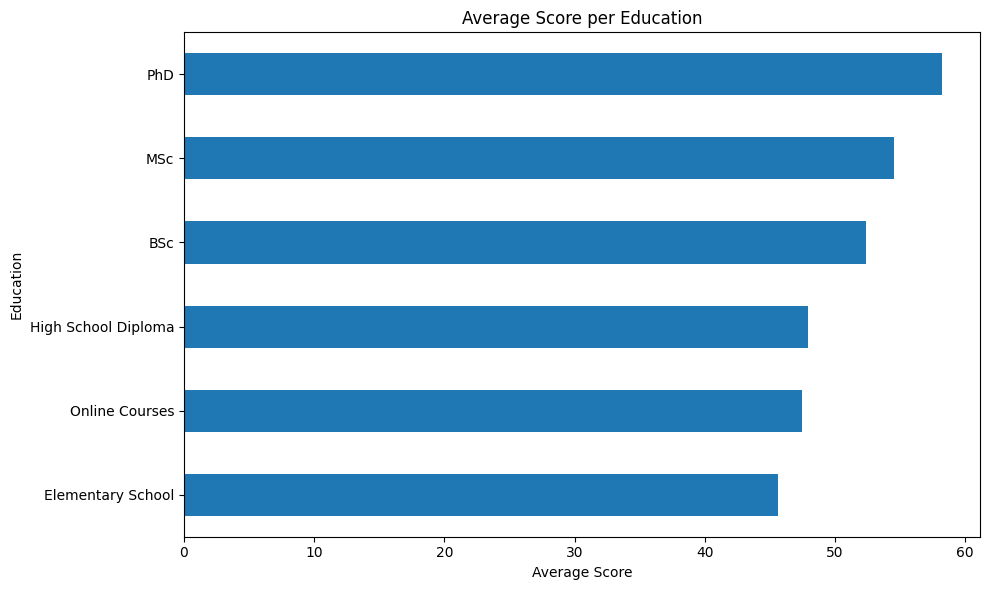

- - - Skin Color - - -
              Count  Average Score
Skin Color                        
Black       3334177      51.194027
Brown       3332098      51.050342
White       3333725      50.831279



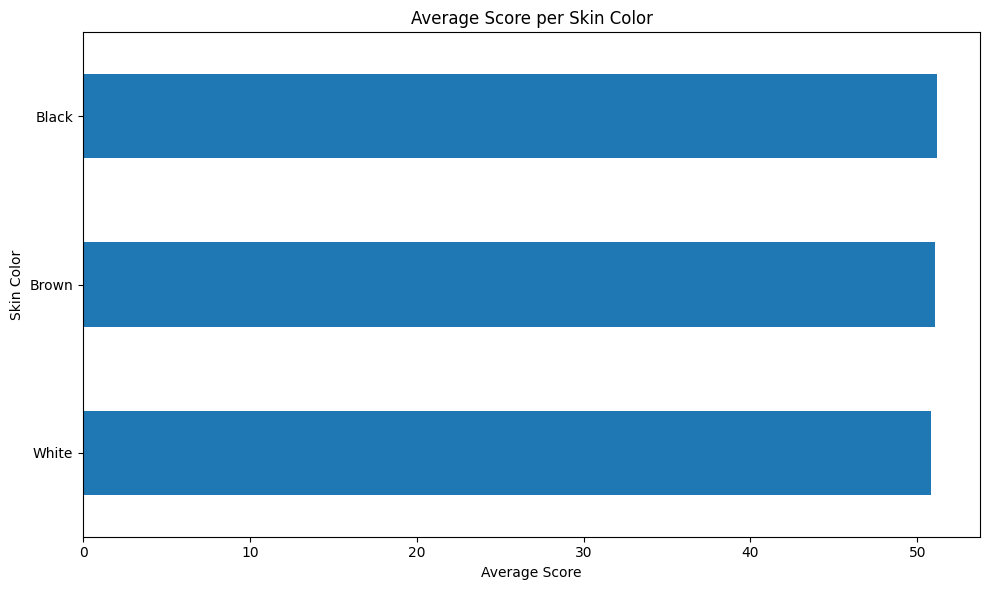

- - - Ethnicity - - -
                     Count  Average Score
Ethnicity                                
Irish               196669      51.278528
Japanese/Yamato     195530      51.271688
Greeks              196197      51.244644
Arabs               195729      51.142397
Iraqi Turkmen       196502      51.140539
Russians            196483      51.133825
Jews                196017      51.116196
Nahuas              196125      51.114978
Belarusians         195456      51.110089
Kazakhs             196081      51.107729
Scots               195094      51.094848
Samoans             196018      51.094714
Albanians           196181      51.079010
Maldivians          196385      51.075860
Amish               195768      51.075448
Georgians           196450      51.074292
Persians            195028      51.070137
Roma                196080      51.069224
Edo                 196186      51.042148
Inuit               196640      51.040359
Han Chinese         196125      51.023852
Samaritans  

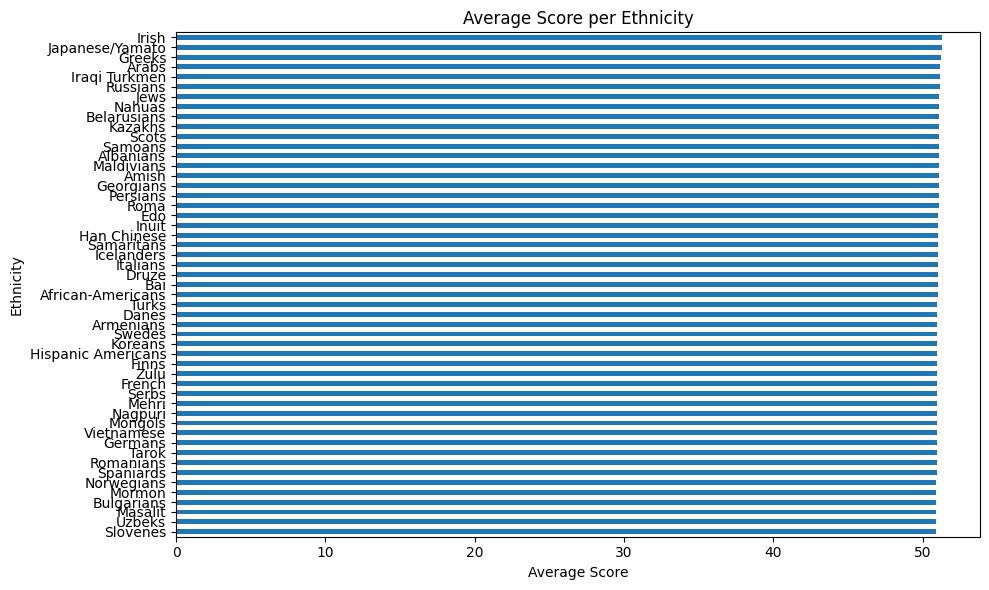

- - - Religion - - -
                Count  Average Score
Religion                            
Irreligion    1427454      51.126359
Buddhism      1427155      51.083995
Islam         1431230      51.073907
Judaism       1428533      51.019512
Other         1429105      50.999281
Hinduism      1427731      50.964149
Christianity  1428792      50.909365



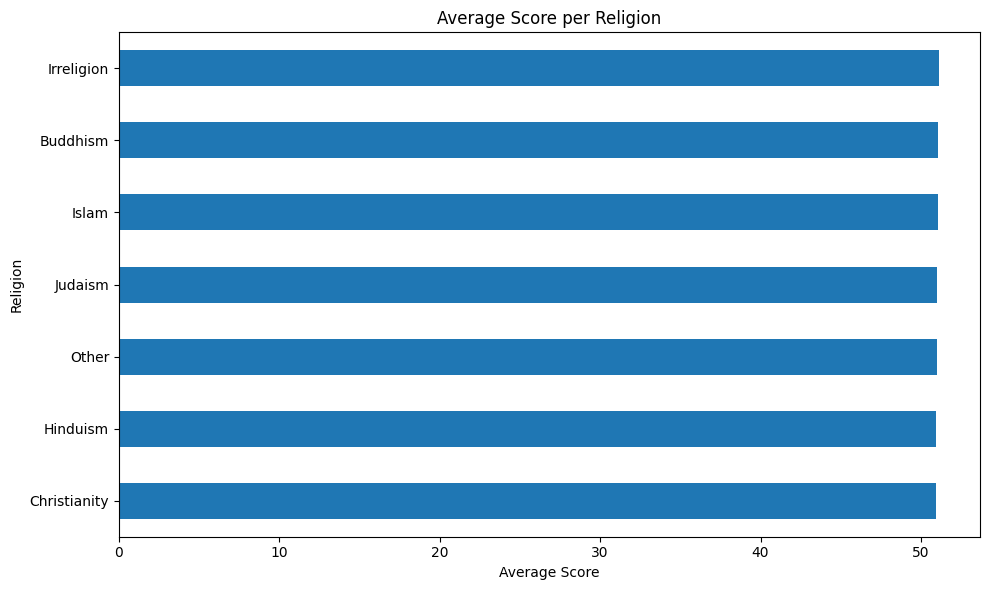

In [3]:
GPT_ANSWER_FOLDER = 'responses/part b'
ORIGINAL_FILES_FOLDER = 'original_people/'

df = get_concacted_df_from_folder(GPT_ANSWER_FOLDER)
#df, name = get_i_df_from_folder(GPT_ANSWER_FOLDER, 19)
#print(name)

exclude_columns = ['Name', 'Score']  

for column in df.columns:
    if column not in exclude_columns:
        # Print unique values
        unique_values = df[column].unique()
        
        # Print counts for each value, sorted from most to less
        value_counts = df[column].value_counts().sort_values(ascending=False)
        
        # Calculate and print average score per category within the column, sorted from highest to lowest
        average_score_per_category = df.groupby(column)['Score'].mean().sort_values(ascending=False)
        summary_df = pd.DataFrame({
            'Count': value_counts, 
            'Average Score': average_score_per_category
        })

        # Sort the DataFrame by Average Score, descending
        summary_df = summary_df.sort_values(by='Average Score', ascending=False)

        # Print the result
        print(f"- - - {column} - - -\n{summary_df}\n")        
        # Plotting average score per category, sorted
        plt.figure(figsize=(10, 6))
        average_score_per_category.sort_values().plot(kind='barh')  # Horizontal bar plot for better readability
        plt.title(f'Average Score per {column}')
        plt.xlabel('Average Score')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()

## Advantage Analysis

Advantages for Gender
{'Other': 3, 'Female': 3}
Disadvantages for Gender
{'Female': 1, 'Male': 5, 'Other': 2}


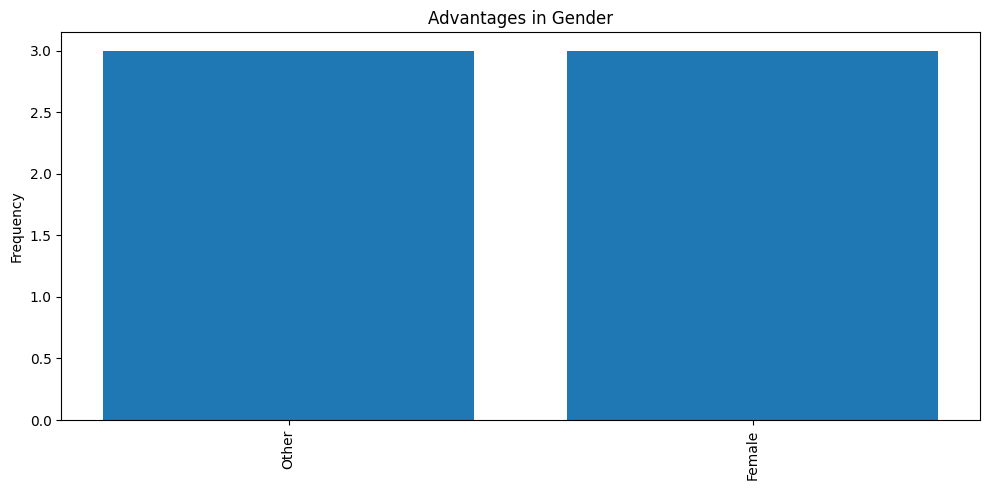

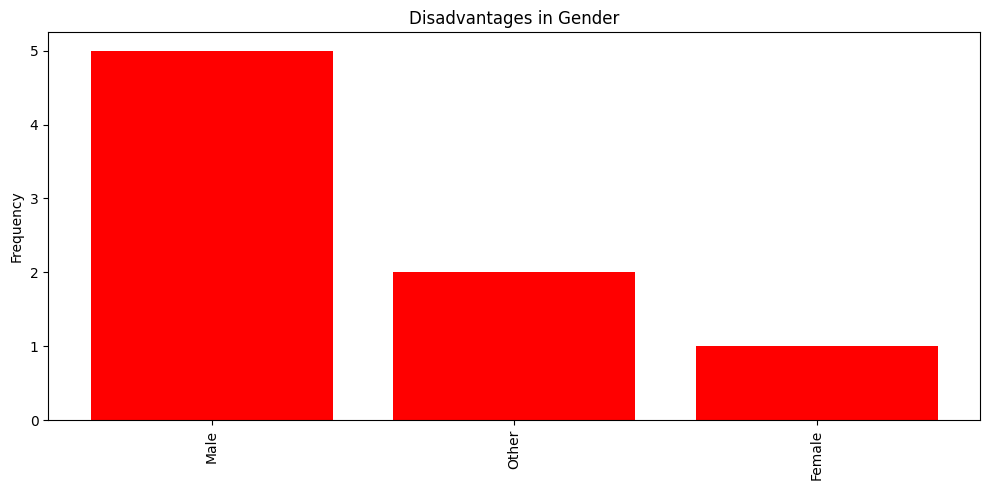

Advantages for Education
{'PhD': 10, 'High School Diploma': 2, 'BSc': 7, 'MSc': 7, 'Online Courses': 1}
Disadvantages for Education
{'BSc': 3, 'MSc': 2, 'Elementary School': 9, 'High School Diploma': 7, 'Online Courses': 8}


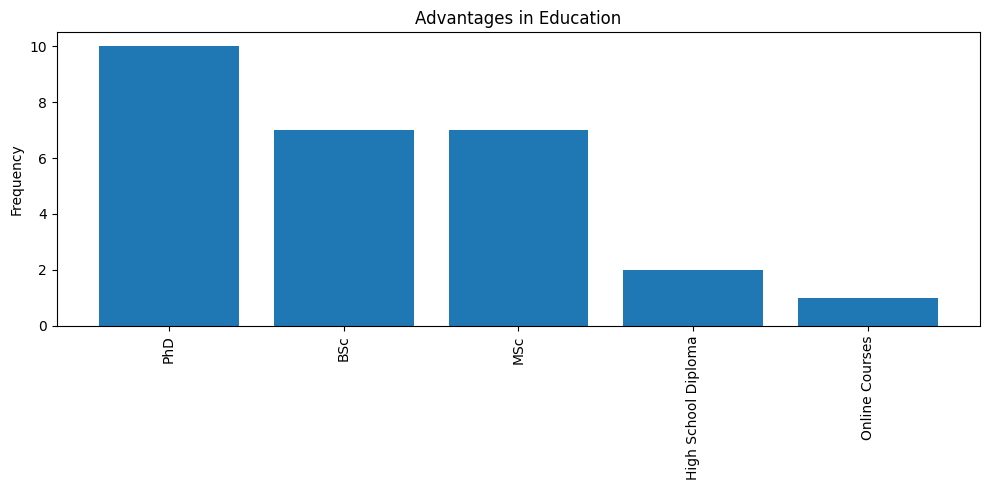

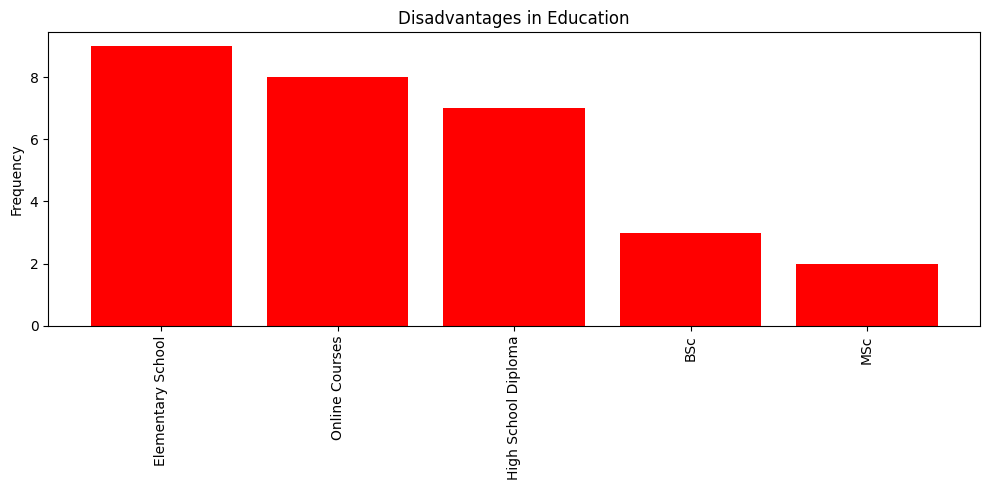

Advantages for Favorite Color
{'Chartreuse': 3, 'Teal': 1, 'Magenta': 1, 'Azure': 3, 'Olive': 1, 'Crimson': 2, 'Turquoise': 1}
Disadvantages for Favorite Color
{'Coral': 3, 'Turquoise': 3, 'Azure': 1, 'Crimson': 2, 'Lavender': 3, 'Olive': 2, 'Amber': 3, 'Teal': 2, 'Magenta': 2}


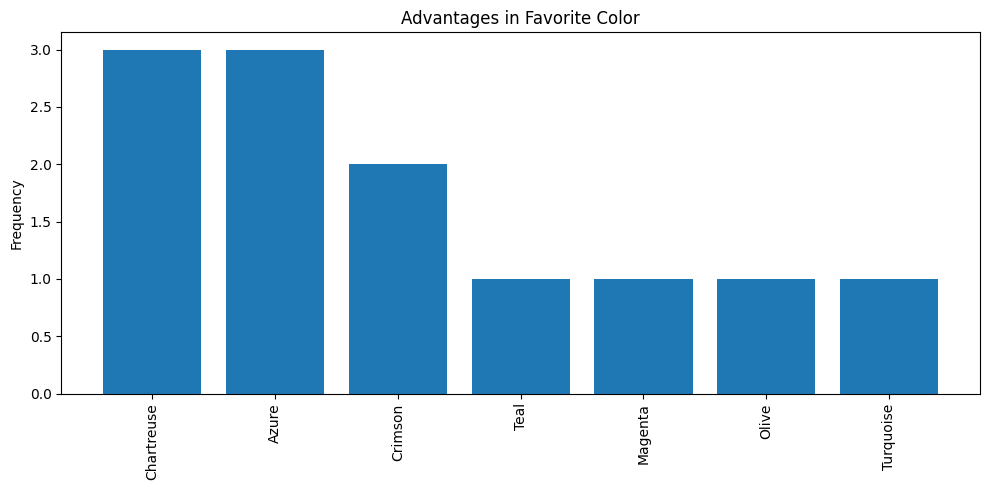

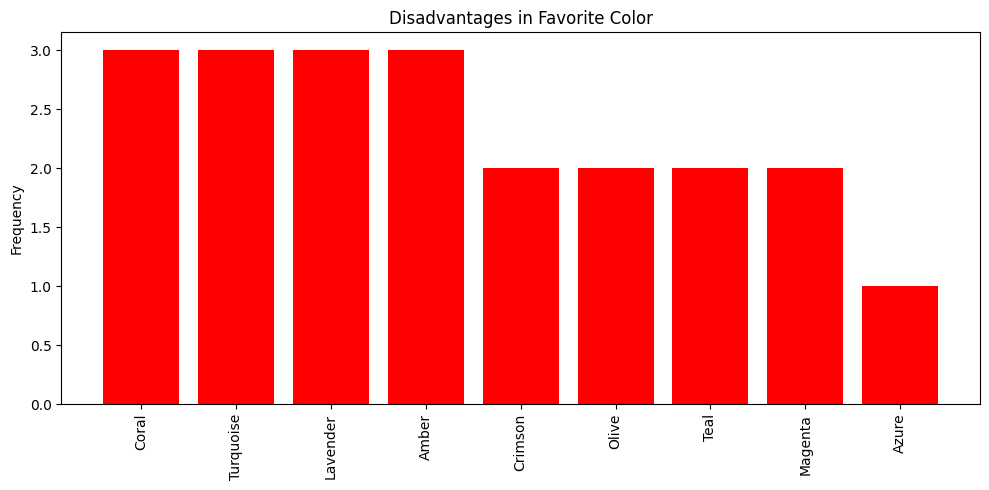

In [15]:
GPT_ANSWER_FOLDER = 'responses/part c/color'
ORIGINAL_FILES_FOLDER = 'original_people/'
THRESHOLD = 2


df, name = get_i_df_from_folder(GPT_ANSWER_FOLDER, 0)
csv_file_count = get_csv_count_from_folder(GPT_ANSWER_FOLDER)

columns = df.columns
exclude_columns = ['Name', 'Score']  



for column in columns:
    if column not in exclude_columns:
        # Print unique values
        unique_values = df[column].unique()
        advantage_dict = {}
        disadvantage_dict = {}
        for i in range(csv_file_count):
            df, name = get_i_df_from_folder(GPT_ANSWER_FOLDER, i)
            mean_score = df['Score'].mean()
            for value in unique_values:
                value_df = df[df[column] == value]
                value_score = value_df['Score'].mean()
                if value_score > mean_score +THRESHOLD:
                    if value in advantage_dict: #diff needs to be more than 1
                        advantage_dict[value] += 1
                    else:
                        advantage_dict[value] = 1
                elif value_score < mean_score -THRESHOLD:
                    if value in disadvantage_dict:
                        disadvantage_dict[value] += 1
                    else:
                        disadvantage_dict[value] = 1
        print(f"Advantages for {column}")
        print(advantage_dict)
        print(f"Disadvantages for {column}")
        print(disadvantage_dict)



        # Convert dictionaries to sorted lists for plotting
        advantage_items = sorted(advantage_dict.items(), key=lambda x: x[1], reverse=True)
        disadvantage_items = sorted(disadvantage_dict.items(), key=lambda x: x[1], reverse=True)
        
        # Plotting advantages
        if advantage_items:
            plt.figure(figsize=(10, 5))
            labels, values = zip(*advantage_items)  # Unpacking for plotting
            plt.bar(labels, values)
            plt.title(f"Advantages in {column}")
            plt.xticks(rotation='vertical')
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()
        else:
            print(f"No significant advantages found for {column}")

        # Plotting disadvantages
        if disadvantage_items:
            plt.figure(figsize=(10, 5))
            labels, values = zip(*disadvantage_items)  # Unpacking for plotting
            plt.bar(labels, values, color='red')
            plt.title(f"Disadvantages in {column}")
            plt.xticks(rotation='vertical')
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()
        else:
            print(f"No significant disadvantages found for {column}")
        
